In [46]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
wine = datasets.load_wine()

In [5]:
x = pd.DataFrame(wine.data, columns=wine.feature_names)
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
y = pd.DataFrame(wine.target, columns=['Target'])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


Text(0, 0.5, 'Intensidad de color')

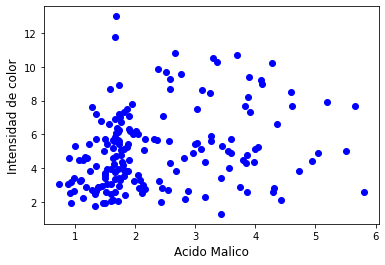

In [14]:
plt.scatter(x['malic_acid'],x['color_intensity'], c = 'blue')
plt.xlabel('Acido Malico',fontsize=12)
plt.ylabel('Intensidad de color',fontsize=12)

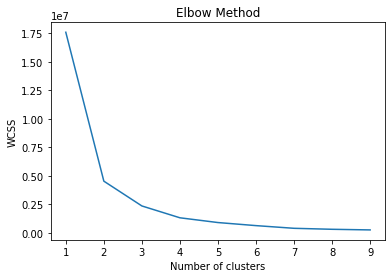

In [19]:
#Aplicando metodo del codo para calcular el K del K-means

wcss = []
h=10
for i in range(1, h):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, h), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#entre 3 y 2

In [29]:
model = KMeans(n_clusters=3,max_iter=10000 )
model.fit(x)
y_labels = model.labels_

In [30]:
y_kmeans = model.predict(x)
print('Predicciones = ', y_kmeans)

Predicciones =  [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [31]:
accuracy = metrics.adjusted_mutual_info_score(wine.target, y_kmeans)
print(accuracy)

0.42268666427661206


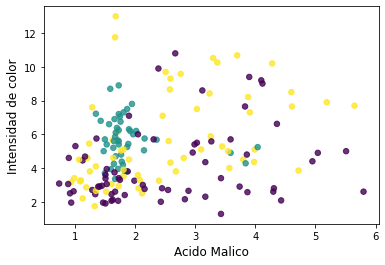

In [39]:
plt.scatter(x['malic_acid'],x['color_intensity'], c = y_kmeans, s=30, alpha=.8)
plt.xlabel('Acido Malico',fontsize=12)
plt.ylabel('Intensidad de color',fontsize=12)
plt.show()

In [45]:
df_w = pd.DataFrame(y_kmeans, columns=['Prediction'])
z = pd.concat([x, df_w],axis=1)

In [47]:
z.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Prediction
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


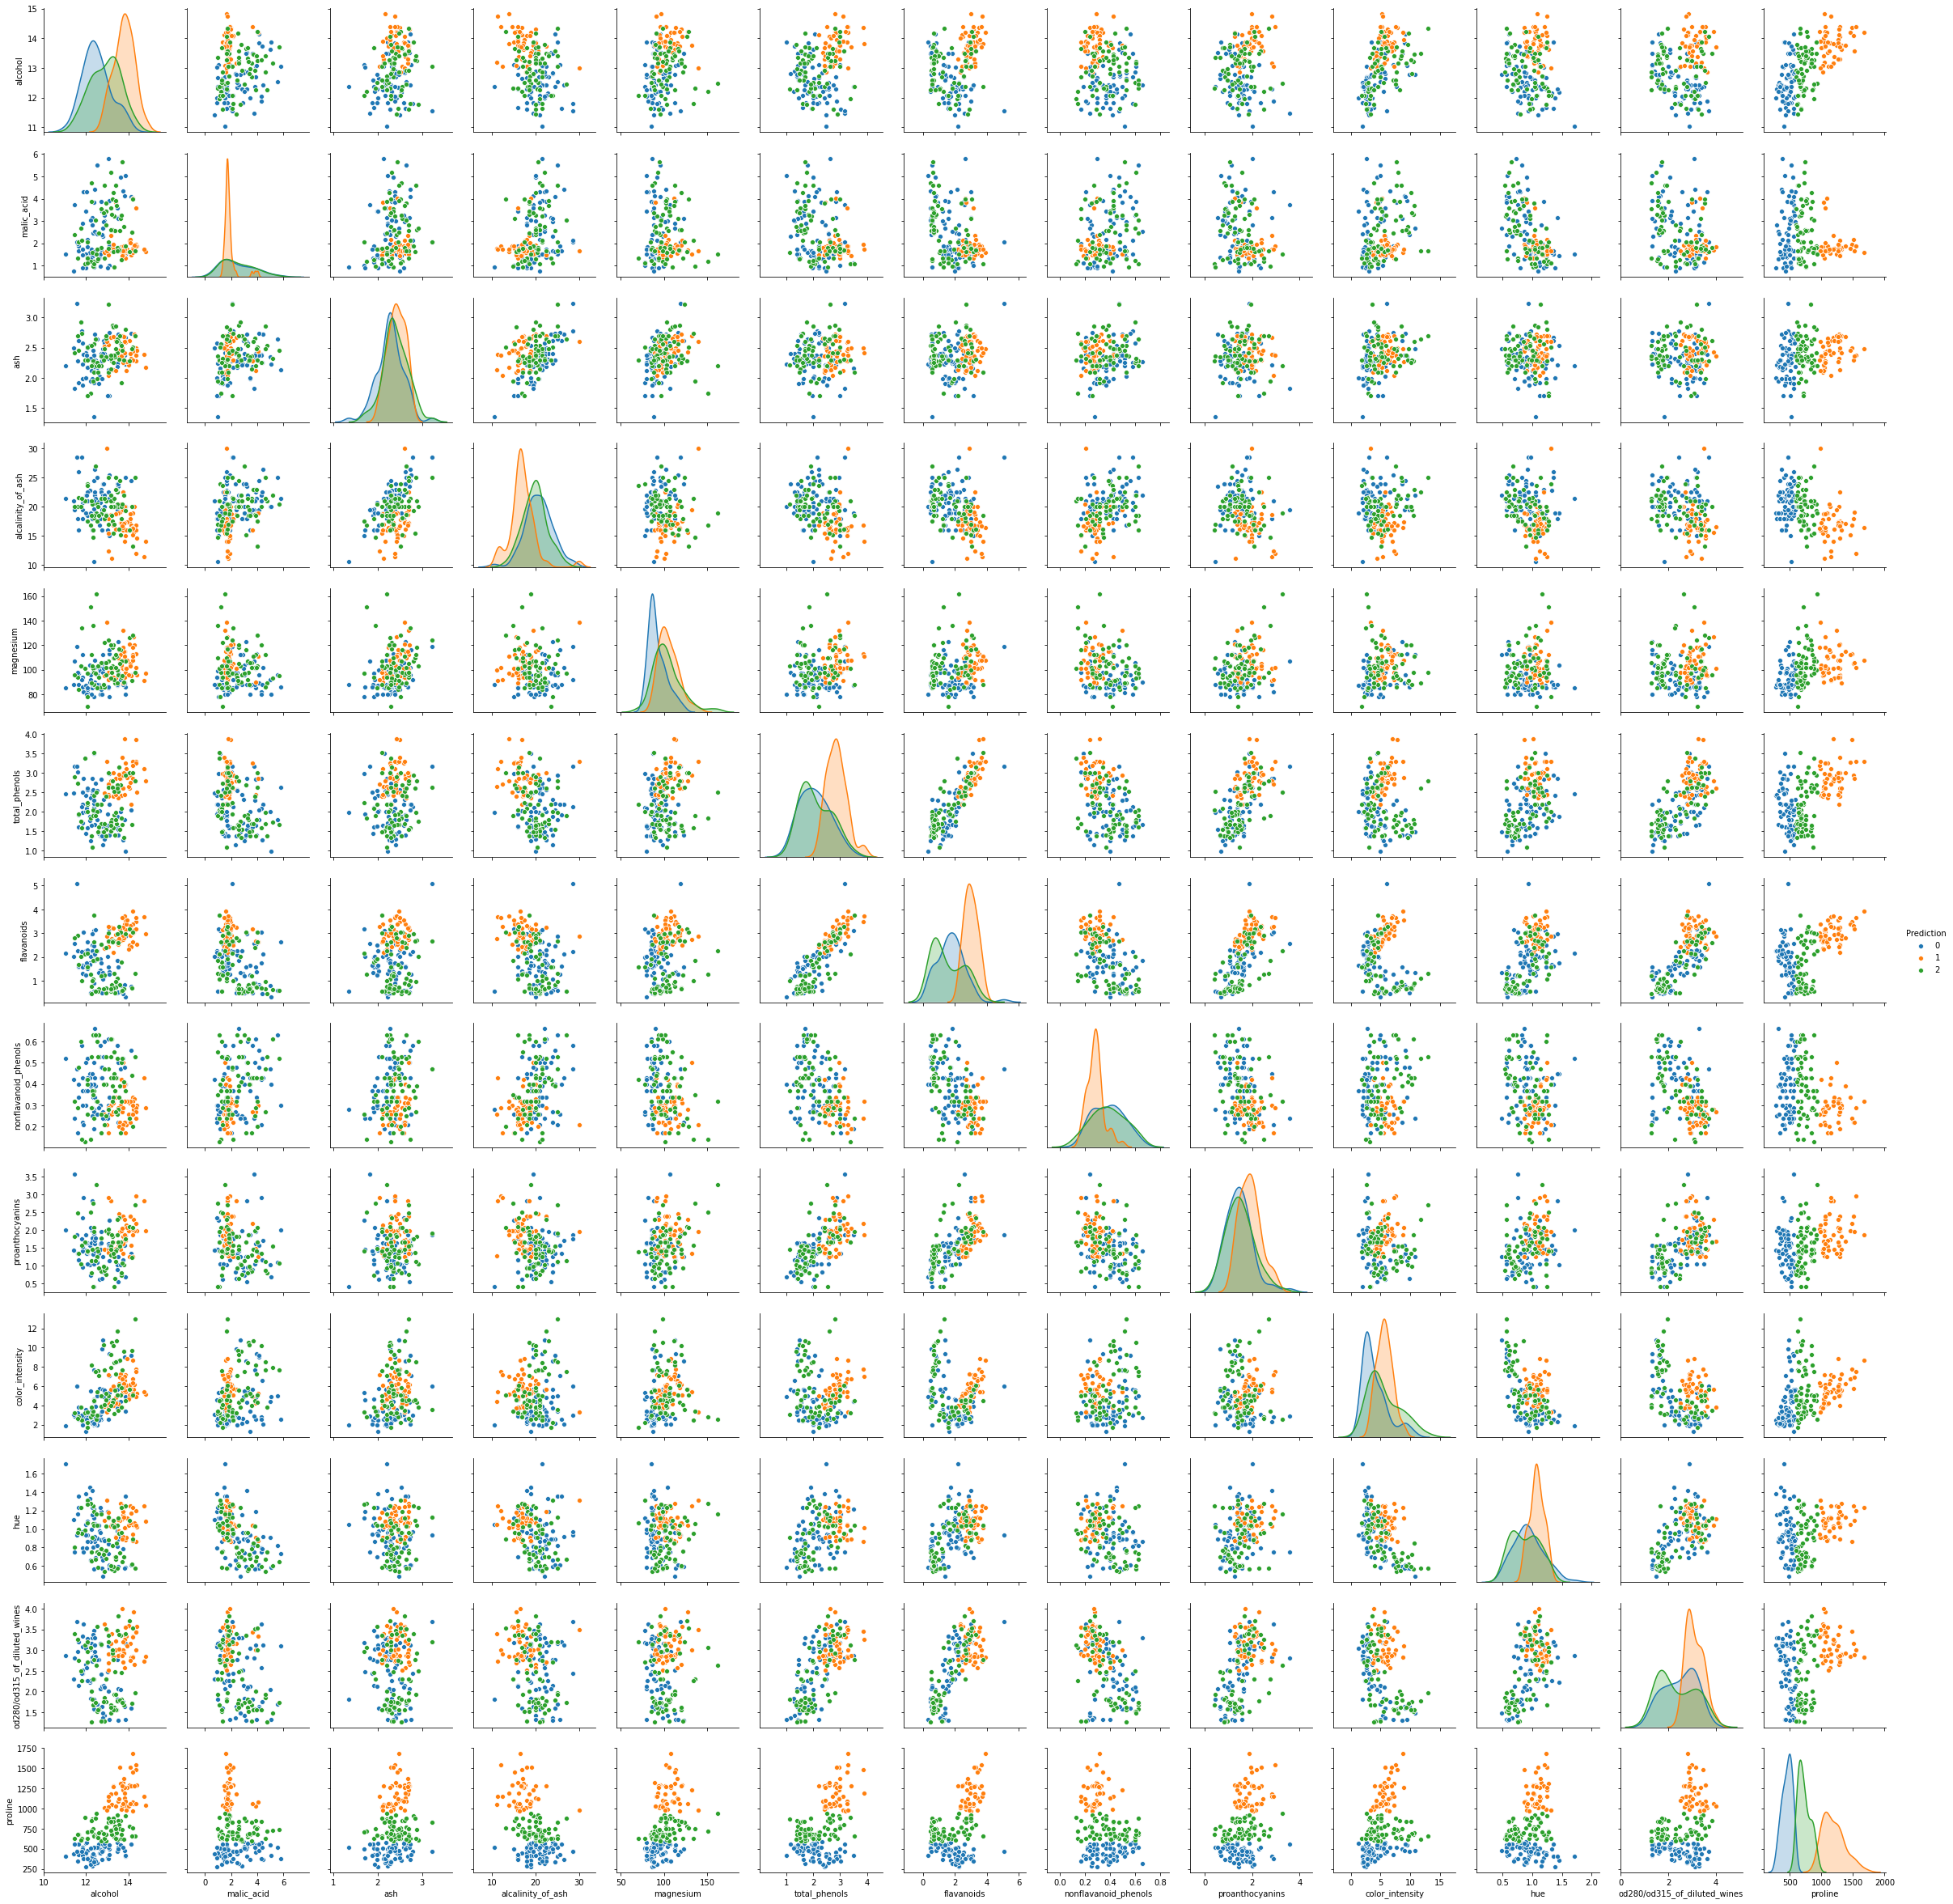

In [51]:
sns.pairplot(z,hue='Prediction')